Data Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/IntroML/content/diabetes.csv'
dataset = pd.read_csv(file_path)

# Assume the target column for diabetes is named 'Outcome' (this is the typical name in the Pima Indians Diabetes dataset)
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Problem 1

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report the classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.

Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Scaling and Standardization:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training & Evaluating Accuracy over Iterations:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


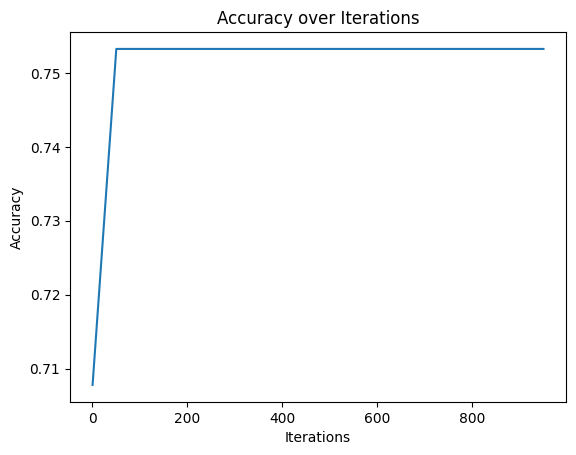

In [ ]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Store accuracy over iterations
accuracies = []

for i in range(1, 1001, 50):  # for every 50 iterations up to 1000
    clf = LogisticRegression(max_iter=i)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy over iterations
plt.plot(range(1, 1001, 50), accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations')
plt.show()

Model Evaluation:

In [ ]:
# Use the model with 1000 iterations for evaluation
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142858


Plotting the Confusion Matrix:

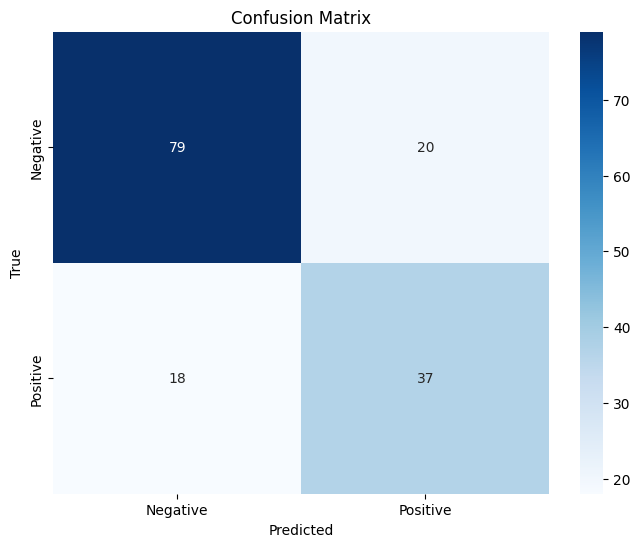

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Problem 2

a. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your classification accuracy over iterations. Also, report your results, including accuracy, precision, recall, and F1 score. At the end, plot the confusion matrix representing your binary classifier.

b. How about adding a weight penalty here, considering the number of parameters? Add the weight penalty repeat the training, and report the results.

Import Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/My Drive/IntroML/content/cancer.csv'
cancer_dataset = pd.read_csv(file_path)


fixing the DATA

In [ ]:
print(cancer_dataset.head())
print("\nColumn names:", cancer_dataset.columns)
print("\nShape of the dataframe:", cancer_dataset.shape)
if 'Unnamed: 32' in cancer_dataset.columns:
    cancer_dataset = cancer_dataset.drop('Unnamed: 32', axis=1)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412


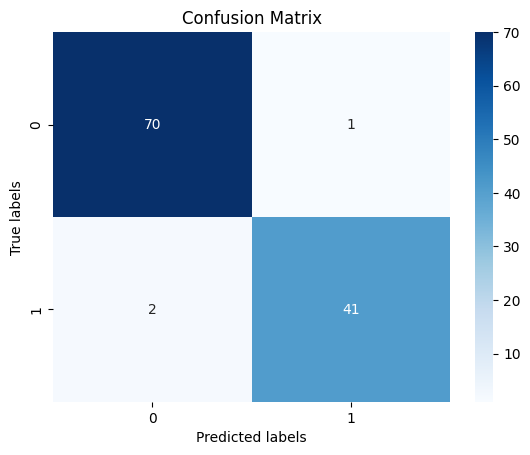

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cancer_dataset has been imported

# Splitting the data into X (features) and y (target)
X = cancer_dataset.drop(columns=['diagnosis'])
y = cancer_dataset['diagnosis'].map({'M': 1, 'B': 0})  # Convert M to 1 and B to 0

# Splitting into training and test set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling and standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics Reporting
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


2 B

In [ ]:
# Train the logistic regression model with L2 penalty
model_l2 = LogisticRegression(penalty='l2', max_iter=10000)
model_l2.fit(X_train_scaled, y_train)

# Predictions with L2 model
y_pred_l2 = model_l2.predict(X_test_scaled)

# Metrics Reporting for L2 model
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print("\nResults with L2 penalty:")
print(f"Accuracy: {accuracy_l2}")
print(f"Precision: {precision_l2}")
print(f"Recall: {recall_l2}")
print(f"F1 Score: {f1_l2}")



Results with L2 penalty:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412


2 B

In [ ]:
model_regularized = LogisticRegression(max_iter=1000, C=0.1)
model_regularized.fit(X_train_scaled, y_train)
y_pred_reg = model_regularized.predict(X_test_scaled)

accuracy_reg = accuracy_score(y_test, y_pred_reg)
precision_reg = precision_score(y_test, y_pred_reg)
recall_reg = recall_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)

print(f"Accuracy (with penalty): {accuracy_reg}")
print(f"Precision (with penalty): {precision_reg}")
print(f"Recall (with penalty): {recall_reg}")
print(f"F1 Score (with penalty): {f1_reg}")

Accuracy (with penalty): 0.9824561403508771
Precision (with penalty): 1.0
Recall (with penalty): 0.9534883720930233
F1 Score (with penalty): 0.9761904761904763


#Problem 3

Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test). Report your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in Problem 2.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Assuming the data has already been imported and split into X_train, X_test, y_train, y_test from Part 2.

# Scaling and standardization (again, for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Naive Bayesian model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predictions using Naive Bayes
y_pred_nb = nb_model.predict(X_test_scaled)

# Metrics Reporting for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes Classifier Metrics:")
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")


Naive Bayes Classifier Metrics:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524


In [ ]:
print("Comparison between Logistic Regression 1 and Naive Bayes:\n")
print(f"Accuracy: LR = {accuracy_l2}, NB = {accuracy_nb}")
print(f"Precision: LR = {precision_l2}, NB = {precision_nb}")
print(f"Recall: LR = {recall_l2}, NB = {recall_nb}")
print(f"F1 Score: LR = {f1_l2}, NB = {f1_nb}")

Comparison between Logistic Regression 1 and Naive Bayes:

Accuracy: LR = 0.9736842105263158, NB = 0.9649122807017544
Precision: LR = 0.9761904761904762, NB = 0.975609756097561
Recall: LR = 0.9534883720930233, NB = 0.9302325581395349
F1 Score: LR = 0.9647058823529412, NB = 0.9523809523809524


In [ ]:
print("Comparison between Logistic Regression 2 and Naive Bayes:\n")
print(f"Accuracy: LR = {accuracy_reg}, NB = {accuracy_nb}")
print(f"Precision: LR = {precision_reg}, NB = {precision_nb}")
print(f"Recall: LR = {recall_reg}, NB = {recall_nb}")
print(f"F1 Score: LR = {f1_reg}, NB = {f1_nb}")

Comparison between Logistic Regression 2 and Naive Bayes:

Accuracy: LR = 0.9824561403508771, NB = 0.9649122807017544
Precision: LR = 1.0, NB = 0.975609756097561
Recall: LR = 0.9534883720930233, NB = 0.9302325581395349
F1 Score: LR = 0.9761904761904763, NB = 0.9523809523809524


#Problem 4

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Report your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare them against problems 2 and 3.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.pipeline import make_pipeline

# Create a dictionary to store results for each value of K
results = {}

max_components = len(X.columns)  # Maximum possible components
for k in range(1, max_components+1):
    # Create a pipeline of PCA and Logistic Regression
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=k), LogisticRegression(max_iter=10000))

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Storing metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[k] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

In [ ]:
optimal_k = max(results, key=lambda k: results[k]['Accuracy'])
print(f"Optimal number of components (K): {optimal_k}")
print(f"Metrics for K={optimal_k}:\n", results[optimal_k])

Optimal number of components (K): 2
Metrics for K=2:
 {'Accuracy': 0.9912280701754386, 'Precision': 1.0, 'Recall': 0.9767441860465116, 'F1 Score': 0.988235294117647}


In [ ]:
# Store evaluation metrics for different numbers of principal components
accuracies = []
precisions = []
recalls = []
f1_scores = []

K = X_train_scaled.shape[1]  # Maximum number of principal components
for n in range(1, K + 1):
    pca = PCA(n_components=n)

    # Create a pipeline with PCA followed by Logistic Regression
    clf = make_pipeline(pca, LogisticRegression(max_iter=1000))

    clf.fit(X_train_scaled, y_train)
    y_pred_pca = clf.predict(X_test_scaled)

    accuracies.append(accuracy_score(y_test, y_pred_pca))
    precisions.append(precision_score(y_test, y_pred_pca))
    recalls.append(recall_score(y_test, y_pred_pca))
    f1_scores.append(f1_score(y_test, y_pred_pca))

# Identify optimum number of components
optimum_components = accuracies.index(max(accuracies)) + 1

print(f"Optimum number of principal components: {optimum_components}")
print(f"Accuracy at optimum components: {accuracies[optimum_components - 1]}")
print(f"Precision at optimum components: {precisions[optimum_components - 1]}")
print(f"Recall at optimum components: {recalls[optimum_components - 1]}")
print(f"F1 Score at optimum components: {f1_scores[optimum_components - 1]}")

Optimum number of principal components: 2
Accuracy at optimum components: 0.9912280701754386
Precision at optimum components: 1.0
Recall at optimum components: 0.9767441860465116
F1 Score at optimum components: 0.988235294117647


#Problem 5

Can you repeat problem 4? This time, replace the logistic regression classifier with the Bayes classifier. Report your results (classification accuracy, precision, recall and F1 score). Compare your results against problems 2, 3 and 4.



In [ ]:
# Create a dictionary to store results for PCA + Naive Bayes for each value of K
results_nb_pca = {}

max_components = X_train.shape[1]  # Maximum possible components
for k in range(1, max_components+1):
    # Create a pipeline of PCA and Naive Bayes
    pipeline_nb = make_pipeline(StandardScaler(), PCA(n_components=k), GaussianNB())

    # Train the model
    pipeline_nb.fit(X_train, y_train)

    # Predictions
    y_pred_nb_pca = pipeline_nb.predict(X_test)

    # Storing metrics
    accuracy = accuracy_score(y_test, y_pred_nb_pca)
    precision = precision_score(y_test, y_pred_nb_pca)
    recall = recall_score(y_test, y_pred_nb_pca)
    f1 = f1_score(y_test, y_pred_nb_pca)

    results_nb_pca[k] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

In [ ]:
optimal_k_nb = max(results_nb_pca, key=lambda k: results_nb_pca[k]['Accuracy'])
print(f"Optimal number of components (K) for PCA + Naive Bayes: {optimal_k_nb}")
print(f"Metrics for K={optimal_k_nb}:\n", results_nb_pca[optimal_k_nb])

Optimal number of components (K) for PCA + Naive Bayes: 2
Metrics for K=2:
 {'Accuracy': 0.9473684210526315, 'Precision': 0.9743589743589743, 'Recall': 0.8837209302325582, 'F1 Score': 0.9268292682926831}
